In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [92]:
cursos_coursera = pd.read_csv("./Datasets/Coursera_courses.csv")

In [93]:
cursos_coursera.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [94]:
cursos_coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [95]:
cursos_coursera.drop(columns="course_url",inplace=True)

In [96]:
coursera_reviews = pd.read_csv("./Datasets/Coursera_reviews.csv")

In [97]:
coursera_reviews.drop(columns="Unnamed: 0",inplace=True)

In [98]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162950 entries, 0 to 1162949
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1162950 non-null  object
 1   reviewers     1162950 non-null  object
 2   date_reviews  1162950 non-null  object
 3   rating        1162950 non-null  int64 
 4   course_id     1162950 non-null  object
dtypes: int64(1), object(4)
memory usage: 44.4+ MB


In [99]:
coursera_reviews.describe()

,rating
count,1.162950e+06
mean,4.673347e+00
std,7.251819e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [100]:
coursera_reviews.dropna(inplace=True)

In [101]:
coursera_reviews.shape

(1162950, 5)

In [102]:
coursera_reviews["reviews"]

0          Pretty dry, but I was able to pass with just t...
1          would be a better experience if the video and ...
2          Information was perfect! The program itself wa...
3          A few grammatical mistakes on test made me do ...
4          Excellent course and the training provided was...
                                 ...                        
1162945                 the hardest one but very interrsting
1162946                         Awesome course to take!!!!!!
1162947                         Awesome course to take!!!!!!
1162948                         Awesome course to take!!!!!!
1162949                                     The best ever !!
Name: reviews, Length: 1162950, dtype: object

# NO VOLVER A CORRER!

In [103]:
# import nltk
# import re

# # Download necessary resources for NLTK
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('vader_lexicon')

# # Function to check if a review is poorly written
# def mal_escrito(review):
#     # Tokenize the review text
#     tokens = nltk.word_tokenize(review)
  
#     # Check if the review has less than a certain number of tokens
#     if len(tokens) < 5:
#         return True
  
#     # Perform part-of-speech tagging on the tokens
#     tagged_tokens = nltk.pos_tag(tokens)
  
#     # Check if the review has mostly nouns and pronouns
#     noun_count = 0
#     pronoun_count = 0
#     for token, tag in tagged_tokens:
#         if re.match(r'NN.*', tag):
#             noun_count += 1
#         elif re.match(r'PRP.*', tag):
#             pronoun_count += 1
  
#     total_count = noun_count + pronoun_count
#     if total_count > 0 and (noun_count / total_count) < 0.5:
#         return True
  
#     return False

# # Apply the is_poorly_written function to drop poorly written reviews
# coursera_reviews = coursera_reviews[~coursera_reviews["reviews"].apply(mal_escrito)]
# coursera_reviews.to_csv("./Datasets/Coursera_reviews.csv")


In [104]:
coursera_reviews["reviews"].drop_duplicates(inplace=True)

In [105]:
coursera_reviews["reviewers"] = coursera_reviews["reviewers"].str.strip()

In [106]:
coursera_reviews["reviewers"].value_counts()

reviewers
By Deleted A        4052
By Muhammad A        506
By Michael S         400
By David M           388
By Abhishek S        376
                    ... 
By PRAJWAL A K         1
By Mayesha M R M       1
By Vadakattu A S       1
By Terrance R          1
By Abiyyu F D          1
Name: count, Length: 234995, dtype: int64

In [107]:
coursera_reviews.drop(coursera_reviews[coursera_reviews["reviewers"]=="By Deleted A"].index,inplace=True)

In [108]:
coursera_reviews.drop(columns="date_reviews",inplace=True)

In [109]:
coursera_reviews.reset_index(inplace=True)

In [110]:
coursera_reviews.drop(columns="index",inplace=True)

In [111]:
coursera_reviews.head()

,reviews,reviewers,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training


In [112]:
cursos_coursera.head()

,name,institution,course_id
0,Machine Learning,Stanford University,machine-learning
1,Indigenous Canada,University of Alberta,indigenous-canada
2,The Science of Well-Being,Yale University,the-science-of-well-being
3,Technical Support Fundamentals,Google,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training


In [113]:
coursera_completo = coursera_reviews.merge(cursos_coursera, on="course_id")

In [114]:
coursera_completo

,reviews,reviewers,rating,course_id,name,institution
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
...,...,...,...,...,...,...
1158893,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158894,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158895,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158896,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [115]:
coursera_completo["reviews"] = coursera_completo["reviews"].loc[~coursera_completo["reviews"].duplicated()]


In [116]:
coursera_completo.dropna(inplace=True)

In [117]:
coursera_completo["name"].value_counts()

name
Programming for Everybody (Getting Started with Python)                           13421
Machine Learning                                                                  12247
Neural Networks and Deep Learning                                                 11900
Learning How to Learn: Powerful mental tools to help you master tough subjects    10758
Technical Support Fundamentals                                                     9669
                                                                                  ...  
Epigenetic Control of Gene Expression                                                 2
Entreprise et changement climatique                                                   2
Entrepreneurship Strategy: From Ideation to Exit                                      1
Introduction to Healthcare                                                            1
Curanderismo: Traditional Healing Using Plants                                        1
Name: count, Length: 602, d

In [118]:
conteo_names = coursera_completo["name"].value_counts()
coursera_completo = coursera_completo[coursera_completo["name"].isin(conteo_names[conteo_names > 5000].index)]


In [119]:
coursera_completo

,reviews,reviewers,rating,course_id,name,institution
13795,I did not find this course helpful. The assign...,By Eric V H,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13796,I got a 95% and maybe I learned something but ...,By Connor B,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13797,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13798,We tried to use this class to teach a brown ba...,By Steve M,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13799,"To be honest, I thought the course stumbled an...",By Terence P,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
...,...,...,...,...,...,...
1158865,great class !!!,By Olibrice D,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158883,loved it\(00)/,By Austin P,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158885,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158886,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [120]:
coursera_graph = coursera_completo[["rating","course_id"]]

In [121]:
coursera_graph = coursera_graph.groupby(by="course_id")["rating"].sum()

In [122]:
coursera_graph = coursera_graph.to_frame().reset_index()


In [123]:
coursera_graph.sort_values("rating",ascending=False)

,course_id,rating
5,python,62614
3,machine-learning,58319
4,neural-networks-deep-learning,56955
2,learning-how-to-learn,51918
7,technical-support-fundamentals,46170
6,python-data,42476
8,the-science-of-well-being,32936
1,excel-essentials,27869
0,ai-for-everyone,26766
9,what-is-datascience,26452


In [124]:
rating_conteo = coursera_completo.groupby('course_id')['rating'].value_counts().unstack(fill_value=0)

In [125]:
rating_conteo

rating,1,2,3,4,5
course_id,,,,,
ai-for-everyone,8,10,52,608,4830
excel-essentials,16,11,32,475,5167
learning-how-to-learn,37,24,134,1384,9179
machine-learning,62,55,204,2095,9831
neural-networks-deep-learning,33,44,247,1787,9789
python,85,72,383,3169,9712
python-data,22,18,96,860,7738
technical-support-fundamentals,91,51,189,1280,8058
the-science-of-well-being,23,10,25,307,6318


In [126]:
rating_porcentaje = rating_conteo.div(rating_conteo.sum(axis=1), axis=0) * 100

In [127]:
rating_porcentaje.round(2)

rating,1,2,3,4,5
course_id,,,,,
ai-for-everyone,0.15,0.18,0.94,11.04,87.69
excel-essentials,0.28,0.19,0.56,8.33,90.63
learning-how-to-learn,0.34,0.22,1.25,12.86,85.32
machine-learning,0.51,0.45,1.67,17.11,80.27
neural-networks-deep-learning,0.28,0.37,2.08,15.02,82.26
python,0.63,0.54,2.85,23.61,72.36
python-data,0.25,0.21,1.10,9.85,88.60
technical-support-fundamentals,0.94,0.53,1.95,13.24,83.34
the-science-of-well-being,0.34,0.15,0.37,4.59,94.54


In [128]:
coursera_titulos = ' '.join(coursera_completo['name'])

In [129]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(coursera_titulos)

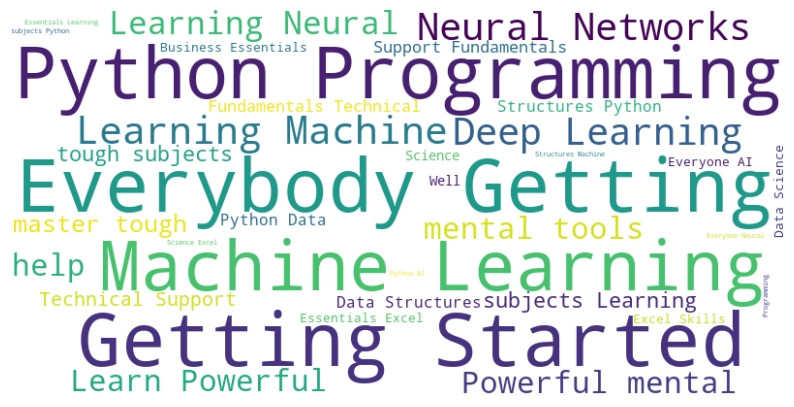

In [130]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [131]:
coursera_completo.to_csv("./SQL/coursera_normalizado.csv")

In [132]:
edx = pd.read_csv("./Datasets/edx_courses.csv")

In [245]:
edx.head()

,title,n_enrolled,Level,subject,language,subtitles,course_length,price,ganancia_curso
0,How to Learn Online,124980,Introductory,Education & Teacher Training,English,English,2 Weeks,49.0,6124020.0
1,Programming for Everybody (Getting Started wit...,293864,Introductory,Computer Science,English,English,7 Weeks,49.0,14399336.0
2,CS50's Introduction to Computer Science,2442271,Introductory,Computer Science,English,English,12 Weeks,90.0,219804390.0
3,The Analytics Edge,129555,Intermediate,Data Analysis & Statistics,English,English,13 Weeks,199.0,25781445.0
4,Marketing Analytics: Marketing Measurement Str...,81140,Introductory,Computer Science,English,English,4 Weeks,249.0,20203860.0


In [134]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [135]:
edx.drop(columns=["summary","course_type","institution","instructors","course_effort","course_description","course_syllabus","course_url"],inplace=True)

In [136]:
edx.columns

Index(['title', 'n_enrolled', 'Level', 'subject', 'language', 'subtitles',
       'course_length', 'price'],
      dtype='object')

In [137]:
edx[["price"]]

,price
0,FREE-Add a Verified Certificate for $49 USD
1,FREE-Add a Verified Certificate for $49 USD
2,FREE-Add a Verified Certificate for $90 USD
3,FREE-Add a Verified Certificate for $199 USD
4,FREE-Add a Verified Certificate for $249 USD
...,...
970,FREE-Add a Verified Certificate for $25 USD
971,FREE-Add a Verified Certificate for $139 USD
972,FREE-Add a Verified Certificate for $139 USD
973,FREE-Add a Verified Certificate for $25 USD


In [138]:
edx['price'] = edx['price'].str.extract(r"(\d+)").astype(float)

In [139]:
edx[edx["price"]<10]

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
6,Leading High-Performing Teams,"32,847",Intermediate,Communication,English,English,10 Weeks,5.0
136,Design Thinking and Creativity for Innovation,"47,549",Intermediate,Business & Management,English,English,10 Weeks,5.0
237,Tourism and Travel Management,"38,503",Introductory,Business & Management,English,English,7 Weeks,5.0
417,Solid Waste Management,"7,668",Introductory,Environmental Studies,English,English,6 Weeks,5.0
458,Unlocking Investment and Finance in Emerging M...,"29,171",Introductory,Economics & Finance,English,English,4 Weeks,5.0
466,e-Learning on Digital Agriculture,"6,238",Introductory,Environmental Studies,English,English,5 Weeks,5.0
564,The Future of Work: Preparing for Disruption,"43,125",Introductory,Economics & Finance,English,"اللغة العربية, English, Español, Français, Рус...",5 Weeks,5.0


In [140]:
edx.dropna(inplace=True)

In [141]:
edx.sort_values("n_enrolled",ascending=False)

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
412,Introduction to Aeronautical Engineering,"99,971",Introductory,Engineering,English,English,7 Weeks,50.0
344,Computer Graphics,"98,553",Intermediate,Computer Science,English,"English, 中文",6 Weeks,99.0
261,Introducción a la gestión de proyectos,"98,517",Introductory,Business & Management,Español,Español,5 Weeks,50.0
329,How to Code: Simple Data,"98,113",Introductory,Computer Science,English,English,7 Weeks,125.0
82,Introduction to Corporate Finance,"98,093",Introductory,Business & Management,English,English,4 Weeks,225.0
...,...,...,...,...,...,...,...,...
783,Globalization: Past and Future,"10,127",Introductory,History,English,"English, Русский",4 Weeks,25.0
505,Digital Transformation in Business,"10,118",Advanced,Business & Management,English,English,7 Weeks,214.0
923,Age of Sustainable Development,"10,019",Intermediate,Social Sciences,English,"English, Português, Русский",14 Weeks,49.0
29,IELTS Academic Test Preparation,"1,103,777",Introductory,Communication,English,English,8 Weeks,99.0


In [142]:
edx["n_enrolled"] = edx["n_enrolled"].str.replace(",","")
edx["n_enrolled"] = edx["n_enrolled"].astype("Int64")

In [143]:
edx.sort_values("n_enrolled",ascending=False)

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
2,CS50's Introduction to Computer Science,2442271,Introductory,Computer Science,English,English,12 Weeks,90.0
29,IELTS Academic Test Preparation,1103777,Introductory,Communication,English,English,8 Weeks,99.0
31,TOEFL® Test Preparation: The Insider’s Guide,1022489,Introductory,Communication,English,English,6 Weeks,49.0
23,CS50's Web Programming with Python and JavaScript,698950,Intermediate,Computer Science,English,English,12 Weeks,90.0
64,Introduction to Linux,642088,Introductory,Computer Science,English,English,14 Weeks,199.0
...,...,...,...,...,...,...,...,...
794,General Overview of Cannabis and the Industry’...,5048,Introductory,Environmental Studies,English,English,4 Weeks,199.0
787,Tools for Academic Engagement in Public Policy,5035,Introductory,Communication,English,English,3 Weeks,199.0
676,Enterprise Selling,5020,Introductory,Business & Management,English,English,6 Weeks,149.0
722,Deep Learning Essentials,5018,Intermediate,Computer Science,English,English,5 Weeks,149.0


In [179]:
edx["ganancia_curso"] = edx["n_enrolled"] * edx["price"]

In [225]:
edx_pr = edx[["n_enrolled","price"]]

In [226]:
edx_price = edx_pr.groupby("price")["n_enrolled"].sum()

In [227]:
edx_price = edx_price.to_frame().reset_index()

In [228]:
edx_price.sort_values("n_enrolled",ascending=False)

,price,n_enrolled
8,49.0,10063575
18,99.0,9952448
29,199.0,4596439
17,90.0,3264459
9,50.0,3192084
24,149.0,2673189
25,150.0,1746238
33,249.0,1347861
4,25.0,1223102
23,139.0,1094260


In [229]:
rangos = [
    (1, 50),
    (51, 100),
    (101, 150),
    (151, 200),
    (201, 250),
    (251, 300),
    (301, 350),
    (351, 400),
    (401, 450)
]


In [230]:
edx_price['price_range'] = pd.cut(edx_price['price'], bins=[r[0]-1 for r in rangos] + [rangos[-1][1]], labels=[f'{r[0]}-{r[1]}' for r in rangos])

In [231]:
edx_price = edx_price.groupby('price_range')['n_enrolled'].sum().reset_index()


In [232]:
edx_price.sort_values("n_enrolled",ascending=False)

,price_range,n_enrolled
0,1-50,15840330
1,51-100,14578450
2,101-150,6445858
3,151-200,5717192
4,201-250,1623993
5,251-300,558974
6,301-350,455272
7,351-400,146452
8,401-450,24108


In [286]:
edx_len = edx[["n_enrolled","course_length"]]

In [287]:
edx_lenght = edx_len.groupby("course_length")["n_enrolled"].sum()

In [288]:
edx_lenght = edx_lenght.to_frame().reset_index()

In [289]:
edx_lenght.sort_values("n_enrolled",ascending=False)

,course_length,n_enrolled
14,6 Weeks,7691916
3,12 Weeks,5910274
16,8 Weeks,5846822
12,4 Weeks,5748168
13,5 Weeks,5251679
1,10 Weeks,4467724
15,7 Weeks,3579155
6,15 Weeks,1288078
5,14 Weeks,1203766
17,9 Weeks,1137350


In [290]:
ranges = [
    (1, 4),
    (5, 8),
    (9, 12),
    (13, 16),
    (17, 20)
]

In [291]:
def get_week_range(weeks):
    for r in ranges:
        if r[0] <= weeks <= r[1]:
            return f"{r[0]}-{r[1]}"
    return np.nan

edx_lenght['week_range'] = edx_lenght['course_length'].str.extract('(\d+)').astype(int).applymap(get_week_range)

edx_lenght = edx_lenght.groupby('week_range')['n_enrolled'].sum().reset_index()

In [292]:
edx_lenght.sort_values("n_enrolled",ascending=False)

,week_range,n_enrolled
3,5-8,22369572
4,9-12,12222657
0,1-4,6892802
1,13-16,3771851
2,17-20,133747


In [308]:
edx_ganancia_length = edx[["course_length","ganancia_curso"]]

In [312]:
edx_ganancia_length.groupby("course_length")["ganancia_curso"].mean().sort_values(ascending=False).round(2)

course_length
12 Weeks    20684460.19
11 Weeks     18199279.0
14 Weeks    14502762.13
16 Weeks    12842624.67
13 Weeks    10912571.33
15 Weeks    10437815.06
8 Weeks      6378280.99
9 Weeks      6123944.45
10 Weeks     6022517.39
6 Weeks      5225643.35
5 Weeks      4231392.68
4 Weeks       4161136.4
7 Weeks      3639283.31
18 Weeks      2897174.0
2 Weeks      1661496.12
17 Weeks      1366181.0
3 Weeks      1251046.35
1 Weeks      1133301.29
Name: ganancia_curso, dtype: Float64

In [310]:
edx_ganancia_length['week_range'] = edx_ganancia_length['course_length'].str.extract('(\d+)').astype(int).applymap(get_week_range)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13688\2737910870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_ganancia_length['week_range'] = edx_ganancia_length['course_length'].str.extract('(\d+)').astype(int).applymap(get_week_range)


In [311]:
edx_ganancia_length.groupby("week_range")["ganancia_curso"].sum().sort_values(ascending=False)

week_range
5-8      2195534537.0
9-12     1375378680.0
1-4       728664940.0
13-16     625009027.0
17-20      10057703.0
Name: ganancia_curso, dtype: Float64

In [152]:
edx_lev = edx[["Level","n_enrolled"]]

In [153]:
edx_level = edx_lev.groupby("Level")["n_enrolled"].sum()

In [154]:
edx_level = edx_level.to_frame().reset_index()

In [155]:
edx_level.sort_values("n_enrolled",ascending=False)

,Level,n_enrolled
2,Introductory,32350969
1,Intermediate,10076928
0,Advanced,2962732


In [314]:
edx[["Level","ganancia_curso"]].groupby("Level")["ganancia_curso"].mean().sort_values(ascending=False).round(2)

Level
Advanced        9418564.08
Introductory    5684744.83
Intermediate     4884769.6
Name: ganancia_curso, dtype: Float64

In [156]:
edx_lan = edx[["language","n_enrolled"]]

In [157]:
edx_language = edx_lan.groupby("language")["n_enrolled"].sum()

In [158]:
edx_language = edx_language.to_frame().reset_index()

In [159]:
edx_language.sort_values("n_enrolled",ascending=False)

,language,n_enrolled
1,English,41068628
2,Español,3704975
4,Italiano,281585
3,Français,161848
7,日本語,62757
6,中文,56158
5,Português,44021
0,Deutsch,10657


In [255]:
cursos_español = edx[edx['language'].str.contains('Spanish', na=False) | edx['subtitles'].str.contains('Español', na=False, case=False, regex=False)]

In [258]:
almenos_español = cursos_español['n_enrolled'].sum()

In [267]:
almenos_español - edx_language["n_enrolled"].iloc[2] 

1765116

In [274]:
subject_edx = edx[["subject","ganancia_curso"]]

In [277]:
subject_edx.groupby("subject")["ganancia_curso"].mean().sort_values(ascending=False).head(5).round(2)

subject
Architecture                  10680593.25
Computer Science              10611107.03
Communication                  9187644.63
Data Analysis & Statistics     8745152.85
Business & Management          6329525.54
Name: ganancia_curso, dtype: Float64

In [279]:
subject_edx["subject"].value_counts().head(5)

subject
Computer Science              150
Business & Management         144
Humanities                     62
Data Analysis & Statistics     60
Engineering                    49
Name: count, dtype: int64

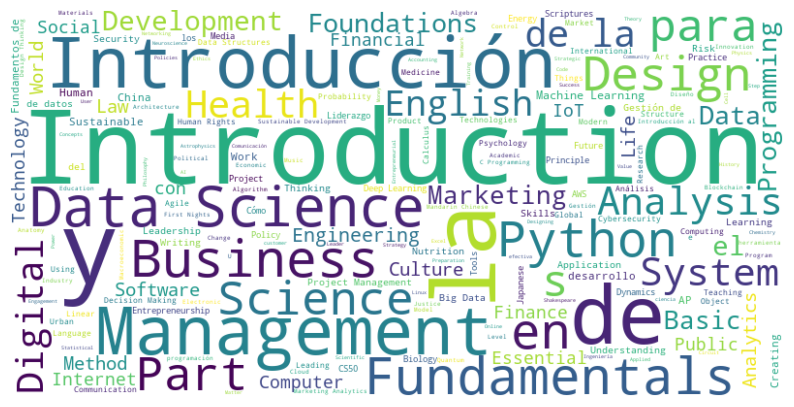

In [160]:
edx_titulos = " ".join(edx["title"])
wordcloudedx = WordCloud(width=800, height=400, background_color='white').generate(edx_titulos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloudedx, interpolation='bilinear')
plt.axis('off')
plt.show()

In [161]:
edx.to_csv("./SQL/edx_normalizado.csv")

In [162]:
udemy = pd.read_csv("./Datasets/udemy_courses.csv")

In [270]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,ganancia_curso
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200


In [164]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [165]:
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [269]:
udemy["ganancia_curso"] = udemy["num_subscribers"] * udemy["price"]

In [166]:
udemy_paid = udemy[["is_paid","num_subscribers"]]

In [167]:
udemy_paid = udemy_paid.groupby(by="is_paid")["num_subscribers"].sum()

In [168]:
udemy_paid = udemy_paid.to_frame().reset_index()

In [169]:
udemy_paid

,is_paid,num_subscribers
0,False,3575525
1,True,8183595


<Axes: xlabel='is_paid', ylabel='num_subscribers'>

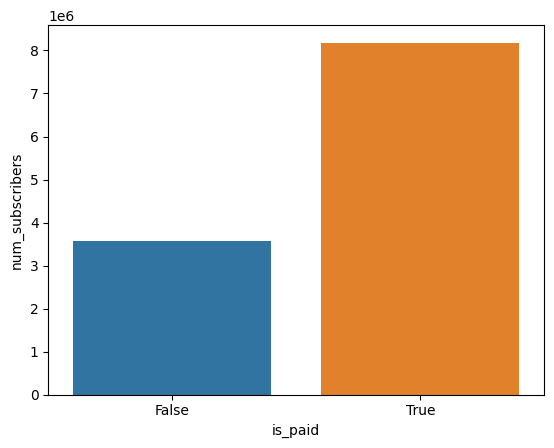

In [170]:
sns.barplot(data=udemy_paid,x="is_paid",y="num_subscribers")

In [171]:
udemy_gratis = udemy[udemy["price"]== 0]

In [172]:
udemy_pago = udemy[udemy["price"] != 0]

In [173]:
usuarios_gratis = udemy_gratis["num_subscribers"].sum()

In [174]:
usuarios_pagos=  udemy_pago["num_subscribers"].sum()

In [175]:
udemy[udemy["course_title"] == "Acoustic Blues Guitar Lessons"]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2062,99324,Acoustic Blues Guitar Lessons,https://www.udemy.com/finger-picking-blues-gui...,False,0,8217,109,10,Intermediate Level,1.0,2013-09-30T20:45:20Z,Musical Instruments
2067,112314,Acoustic Blues Guitar Lessons,https://www.udemy.com/jim-bruce-blues-guitar-l...,True,125,1284,136,40,Intermediate Level,12.5,2013-11-28T08:54:00Z,Musical Instruments
2158,647276,Acoustic Blues Guitar Lessons,https://www.udemy.com/acoustic-blues-guitar-le...,True,75,189,18,101,Intermediate Level,4.5,2016-01-10T21:39:42Z,Musical Instruments


In [176]:
(usuarios_pagos / usuarios_gratis) * 100

228.87813677711665

In [271]:
subject_udemy = udemy[["subject","ganancia_curso"]]

In [273]:
subject_udemy.groupby("subject")["ganancia_curso"].mean().sort_values(ascending=False)

subject
Web Development        525703.145833
Graphic Design         127666.948590
Business Finance       103544.196653
Musical Instruments     78469.198529
Name: ganancia_curso, dtype: float64

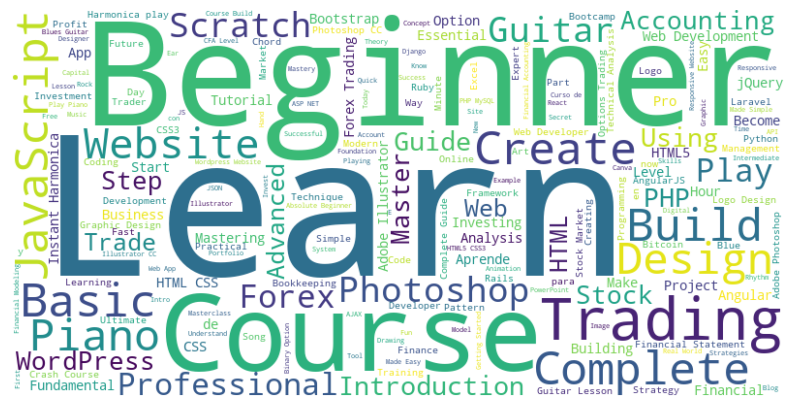

In [177]:
udemy_titulos = " ".join(udemy["course_title"])
wordcloududemy = WordCloud(width=800, height=400, background_color='white').generate(udemy_titulos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloududemy, interpolation='bilinear')
plt.axis('off')
plt.show()

In [178]:
udemy.to_csv("./SQL/udemy_normalizado.csv")